In [ ]:
# Mapping data from GLEA, 1993-2013
#plots for final

an actual method for getting done:
1
- Plot west coast earthquakes 
- plot the mean and errors (anomaly - look at past lesson example for this)
- try to fit a curve to the data using a sign function (find that lesson example)

2
- get Sea temp for west coast
- plot mean & error bars
- try to fit curve with sin function

3
Compare the two final functions and discuss if there is a match.. do it in the notebook


In [2]:
#packages
import geopandas
import numpy as np
import pandas as pd
import datetime
#from shapely.geometry import Point
#import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
#import cartopy.crs as ccrs
%matplotlib inline

In [3]:
quakeData = pd.read_csv('data/GLEA_1993_2023_HC.tsv', sep='\t')
#quakeData.info()
quakeData.head()

,hypocenter_type,quality,year,month,day,hour,minute,second,latitude,longitude,depth,magnitude_1,magnitude_2,region,eventname
0,SWEM,A,1993,1,24,10,21,4.0,68.50,-33.50,10.0,0.0,5.1,EASTERNGREENLAND,199301241021A
1,SWEM,B,1993,7,26,12,26,40.0,65.75,-41.25,10.0,0.0,4.9,WESTERNGREENLAND,199307261226A
2,SWEM,A,1993,8,5,2,0,40.0,68.75,-32.75,10.0,0.0,4.9,EASTERNGREENLAND,199308050200A
3,SWEM,C,1993,10,19,21,10,0.0,66.50,-37.50,10.0,0.0,4.8,EASTERNGREENLAND,199310192110A
4,SWEM,C,1993,11,30,7,33,52.0,67.50,-33.50,10.0,0.0,5.0,EASTERNGREENLAND,199311300733A


In [4]:
quakeData['date'] = pd.to_datetime(quakeData[['year', 'month', 'day', 'hour', 'minute', 'second']])
#quakeData['dateToOrdinal'] = quakeData['date'].map(pd.Timestamp.toordinal)
quakeData.set_index('date')
quakeData

,hypocenter_type,quality,year,month,day,hour,minute,second,latitude,longitude,depth,magnitude_1,magnitude_2,region,eventname,date
0,SWEM,A,1993,1,24,10,21,4.0,68.50,-33.50,10.0,0.0,5.1,EASTERNGREENLAND,199301241021A,1993-01-24 10:21:04
1,SWEM,B,1993,7,26,12,26,40.0,65.75,-41.25,10.0,0.0,4.9,WESTERNGREENLAND,199307261226A,1993-07-26 12:26:40
2,SWEM,A,1993,8,5,2,0,40.0,68.75,-32.75,10.0,0.0,4.9,EASTERNGREENLAND,199308050200A,1993-08-05 02:00:40
3,SWEM,C,1993,10,19,21,10,0.0,66.50,-37.50,10.0,0.0,4.8,EASTERNGREENLAND,199310192110A,1993-10-19 21:10:00
4,SWEM,C,1993,11,30,7,33,52.0,67.50,-33.50,10.0,0.0,5.0,EASTERNGREENLAND,199311300733A,1993-11-30 07:33:52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,SWEM,C,2023,11,11,5,20,24.0,73.00,-55.00,10.0,0.0,4.8,WESTERNGREENLAND,202311110520A,2023-11-11 05:20:24
1021,SWEM,B,2023,11,20,16,43,36.0,76.00,-62.00,10.0,0.0,5.0,WESTERNGREENLAND,202311201643A,2023-11-20 16:43:36
1022,SWEM,A,2023,11,20,16,48,40.0,76.25,-61.25,10.0,0.0,5.0,WESTERNGREENLAND,202311201648A,2023-11-20 16:48:40
1023,SWEM,C,2023,11,24,2,52,56.0,65.50,-40.50,10.0,0.0,4.7,WESTERNGREENLAND,202311240252A,2023-11-24 02:52:56


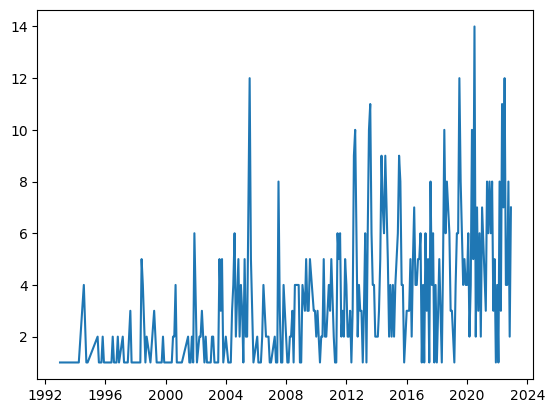

In [7]:
# plot totals fro every month in range
# took me na hour and I thin
start_year = 1993
end_year = 2023  
years = list(range(start_year, end_year))
dfBuffer = []

for year in years:
    # get data from year
    dataByYear = quakeData[quakeData['year'] == year]

    # group by month and convert to series based on size
    eventsMonthly = dataByYear.groupby(dataByYear.month).size()

    # convert first column (the index) to a date format using the month number and current year
    dates = pd.to_datetime({'year': year, 'month': eventsMonthly.index, 'day': 1})

    # Create a new DataFrame to pair the converted dates with the event counts
    df = pd.DataFrame({'date': dates, 'event_count': eventsMonthly.values})
    dfBuffer.append(df)
    

AllEvents = pd.concat(dfBuffer, ignore_index=True)
AllEvents.set_index('date')
#print(result)

# Create the plot
fig, ax = plt.subplots()

# Plot the East Coast bars
plt.plot(AllEvents.date, AllEvents.event_count, label='East Coast', color='tab:blue')

#AllEventsByMonth.plot(kind='bar', title=f"Montly Glacial Earthquakes, {year} Greenland)", xlabel="Month", ylabel="Total Glacial Quakes", color="skyblue")


<function matplotlib.pyplot.show(close=None, block=None)>

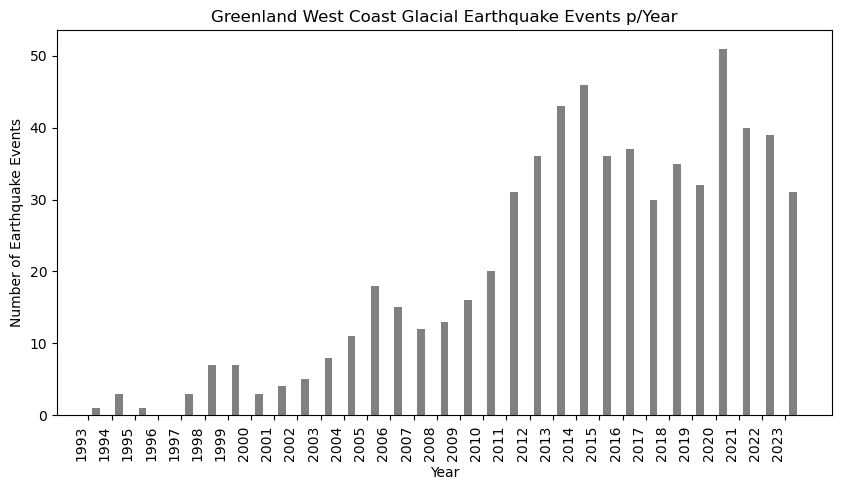

In [34]:
# plot by region and year, thanks GPT!!!!!!!!
grp_YearCoast = quakeData.groupby(['year', 'region']).size().unstack(fill_value=0)

bar_width = 1/3
years = grp_YearCoast.index
#east_grp = grp_YearCoast['EASTERNGREENLAND']
west_grp = grp_YearCoast['WESTERNGREENLAND']
north_grp = grp_YearCoast['BAFFINBAY']
northwest_grp = pd.concat([west_grp, north_grp]).groupby('year').sum()
#print(northwest_grp)
# The x locations for the groups
x = np.arange(len(years))

# Create the plot
fig, ax = plt.subplots(figsize=(10,5))

# Plot the West Coast bars
ax.bar(x + bar_width, northwest_grp, bar_width,  color='grey')

# Add labels, title, and legend
ax.set_xlabel('Year')
ax.set_ylabel('Number of Earthquake Events')
ax.set_title('Greenland West Coast Glacial Earthquake Events p/Year')
ax.set_xticks(x)
ax.set_xticklabels(years, rotation=90, ha='right')
plt.show

In [75]:
#fit curve
from scipy import optimize

def linfunc(x, a, b):
    y = a*x + b
    return y

#convert series to dataframe for ease of use
eventsDf = pd.DataFrame({'date': northwest_grp.index, 'count': northwest_grp.values})
#print(eventsDf)
#print(eventsDf.iloc[:, 1])

# Get the model parameters
mest_lin = optimize.curve_fit(linfunc, xdata = x, ydata=eventsDf.iloc[:, 1])[0]
print(mest_lin)

[ 1.59233871 -3.43346774]


<function matplotlib.pyplot.show(close=None, block=None)>

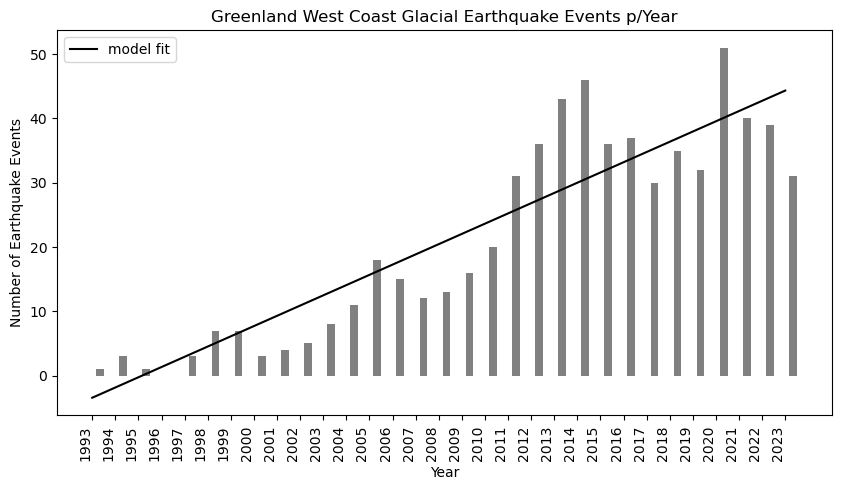

In [76]:
# Create the plot
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(x, linfunc(x, mest_lin[0], mest_lin[1]), 'k-', label="model fit")
#plt.plot(x, northwest_grp.values, 'bo', label="observed data")
ax.bar(x + bar_width, northwest_grp, bar_width,  color='grey')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Earthquake Events')
ax.set_title('Greenland West Coast Glacial Earthquake Events p/Year')
ax.set_xticks(x)
ax.set_xticklabels(years, rotation=90, ha='right')
ax.legend()
plt.show

In [77]:
# exponential model

def expfunc(x, a, b, c):
    y = a + b*x**c
    return y

# Get the model parameters
mest_exp = optimize.curve_fit(expfunc, xdata = x, ydata=eventsDf.iloc[:, 1])[0]
print(mest_exp)
resultsExp = expfunc(x, mest_exp[0], mest_exp[1], mest_exp[2])

[-2.27775782  1.18865062  1.08290833]


<function matplotlib.pyplot.show(close=None, block=None)>

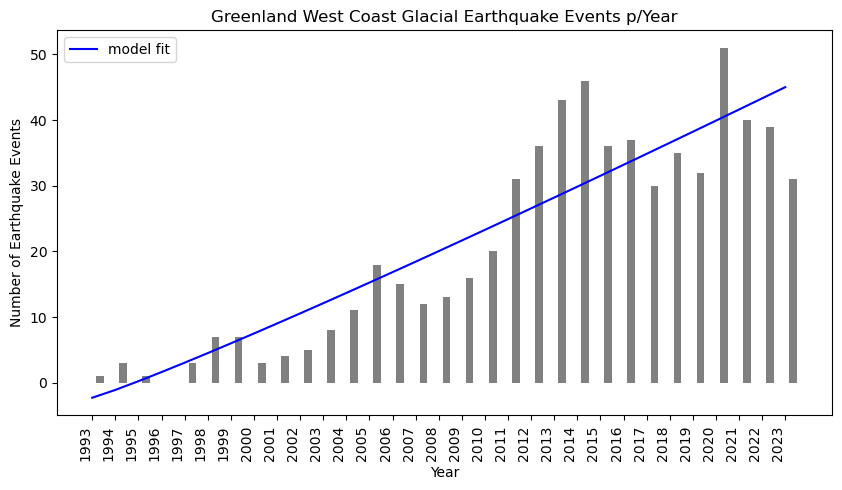

In [88]:
# Create the plot
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(x, resultsExp, 'b-', label="model fit")
#plt.plot(x, northwest_grp.values, 'bo', label="observed data")
ax.bar(x + bar_width, northwest_grp, bar_width,  color='grey')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Earthquake Events')
ax.set_title('Greenland West Coast Glacial Earthquake Events p/Year')
ax.set_xticks(x)
ax.set_xticklabels(years, rotation=90, ha='right')
ax.legend()
plt.show

In [91]:
# sin model

def sinfunc(x, a, b, c):
    # a = amplitude coefficient
    # b = wave frequency
    # c = wave phase
    y = a*x * np.sin(x*b+c)
    return y

def sinfuncExp(x, a, b, c, d): # Py solve can't handle this!
    # a = amplitude
    # b = wave frequency
    # c = wave phase
    # d = amplitude expon. increase
    y = a*x**d * np.sin(x*b+c)
    return y

# Get the model parameters
mest_sin = optimize.curve_fit(sinfunc, xdata = x, ydata=eventsDf.iloc[:, 1])[0]
print(mest_sin)
resultSin = sinfunc(x, mest_sin[0], mest_sin[1], mest_sin[2])

[-0.61618195  0.75263302  8.61256546]


<function matplotlib.pyplot.show(close=None, block=None)>

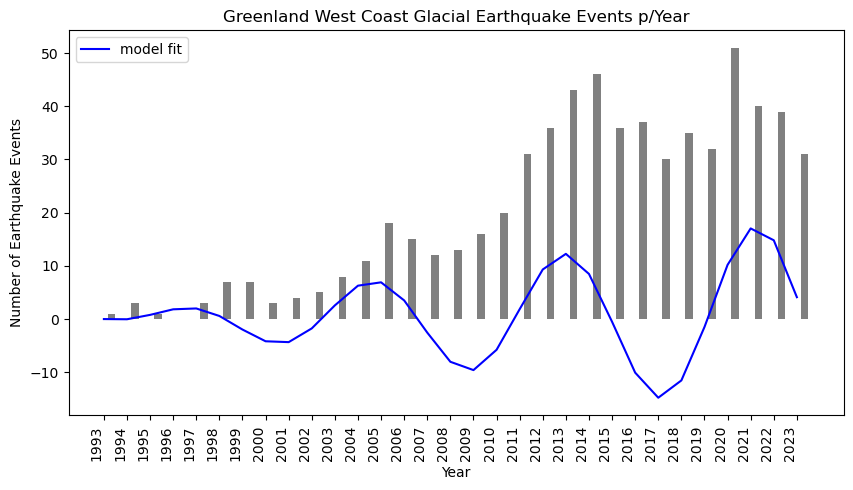

In [92]:
# Create the plot
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(x, resultSin, 'b-', label="model fit")
#plt.plot(x, northwest_grp.values, 'bo', label="observed data")
ax.bar(x + bar_width, northwest_grp, bar_width,  color='grey')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Earthquake Events')
ax.set_title('Greenland West Coast Glacial Earthquake Events p/Year')
ax.set_xticks(x)
ax.set_xticklabels(years, rotation=90, ha='right')
ax.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

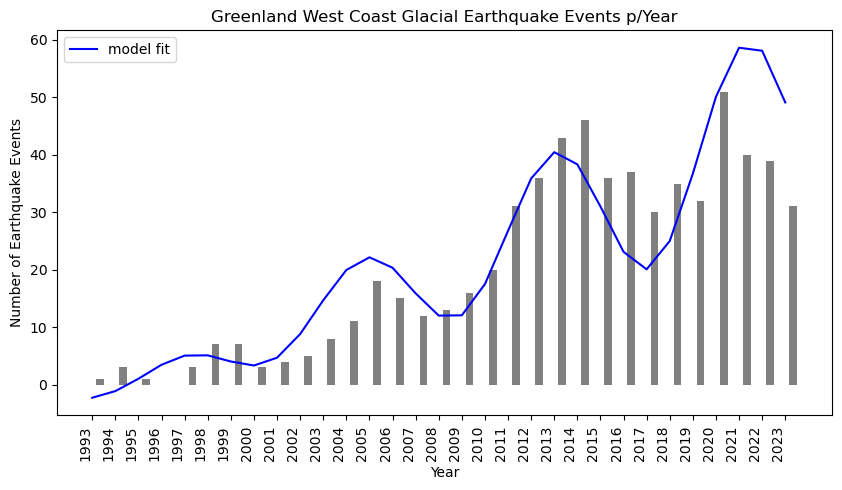

In [90]:
# Create the plot
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(x, resultsExp+resultSin, 'b-', label="model fit")
#plt.plot(x, northwest_grp.values, 'bo', label="observed data")
ax.bar(x + bar_width, northwest_grp, bar_width,  color='grey')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Earthquake Events')
ax.set_title('Greenland West Coast Glacial Earthquake Events p/Year')
ax.set_xticks(x)
ax.set_xticklabels(years, rotation=90, ha='right')
ax.legend()
plt.show